In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

2024-02-05 18:43:15.643589: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 18:43:15.643719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 18:43:15.810927: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dataset_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dataset_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
val_dataset_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

In [3]:
IMG_SIZE = 224

In [4]:
train_dataset = image_dataset_from_directory(
    train_dataset_path,
    color_mode='grayscale',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    shuffle=True
)

test_dataset = image_dataset_from_directory(
    test_dataset_path,
    color_mode='grayscale',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    shuffle=True
)

val_dataset = image_dataset_from_directory(
    val_dataset_path,
    color_mode='grayscale',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    shuffle=True
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [5]:
classes = train_dataset.class_names

In [6]:
import matplotlib.pyplot as plt

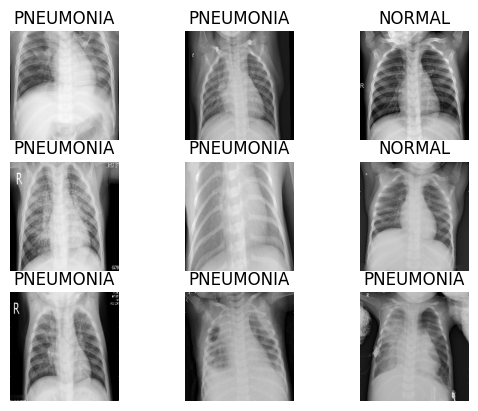

In [7]:
for image, label in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.axis('off')
        plt.title(classes[int(label[i])])
        plt.imshow(image[i], cmap='gray');

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, LeakyReLU, Rescaling

In [34]:
model = Sequential([
    Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    Conv2D(filters=16, kernel_size=(2, 2)),
    MaxPool2D(pool_size=(2, 2)),
    LeakyReLU(),
    
    Conv2D(filters=32, kernel_size=(3, 3)),
    MaxPool2D(pool_size=(2, 2)),
    LeakyReLU(),
    
    Flatten(),
    
    Dense(128),
    LeakyReLU(),
    Dense(32),
    LeakyReLU(),
    Dense(1, activation='sigmoid')
])

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 1)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 223, 223, 16)      80        
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 111, 111, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                 

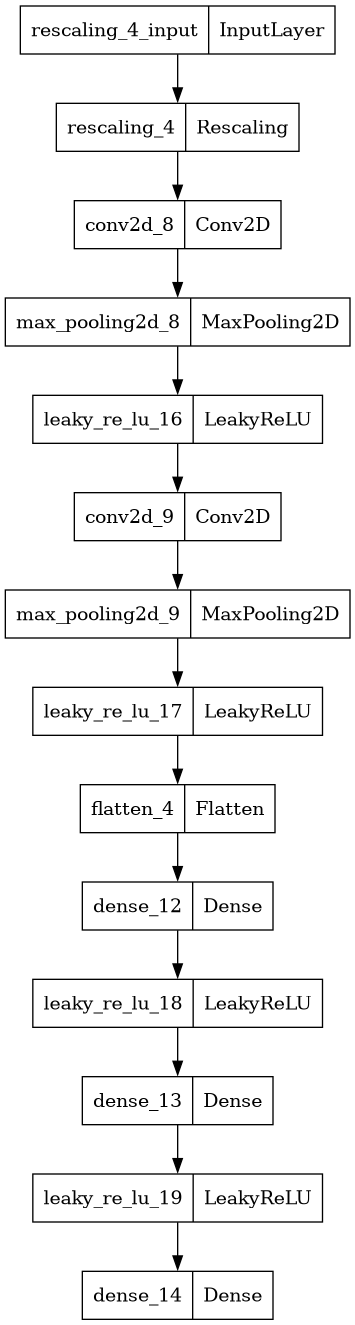

In [36]:
keras.utils.plot_model(model)

In [37]:
from tensorflow.keras.optimizers import Adam

In [38]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [39]:
hist = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=2,
    verbose=2
)

Epoch 1/2
163/163 - 18s - loss: 2.5321 - accuracy: 0.8418 - val_loss: 0.5184 - val_accuracy: 0.7821 - 18s/epoch - 113ms/step
Epoch 2/2
163/163 - 17s - loss: 0.1184 - accuracy: 0.9538 - val_loss: 0.7468 - val_accuracy: 0.7804 - 17s/epoch - 106ms/step


In [40]:
model.evaluate(test_dataset)

20/20 [==============================] - 1s 43ms/step - loss: 0.7468 - accuracy: 0.7804


[0.7467713356018066, 0.7804487347602844]

In [41]:
y_pred = model.predict(test_dataset)

20/20 [==============================] - 2s 44ms/step


In [42]:
y_pred[0]

array([0.9723408], dtype=float32)